Dieses Skript visualisiert die beiden EEG Kanäle, die in `exp_02_02` visualisiert wurden. Dies ist ein Sanity Check für das Preprocessing.

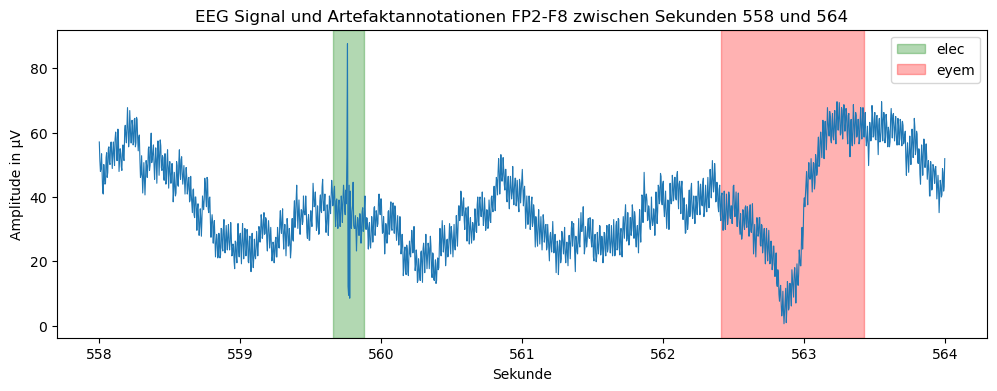

In [6]:
from utils.visualize_eeg import visualize_eeg_with_artifacts

fig = visualize_eeg_with_artifacts(
    edf_file_path="../../../../tuar_processed/unsorted/aaaaagcs_s002_t000.edf",
    csv_file_path="../../../../tuar_processed/unsorted/aaaaagcs_s002_t000.csv",
    channel='FP2-F8',
    interval_start=558,
    interval_stop=564
)
fig.savefig("output/exp_02_06_artifact_visualization_comparison_1.svg")
fig.show()

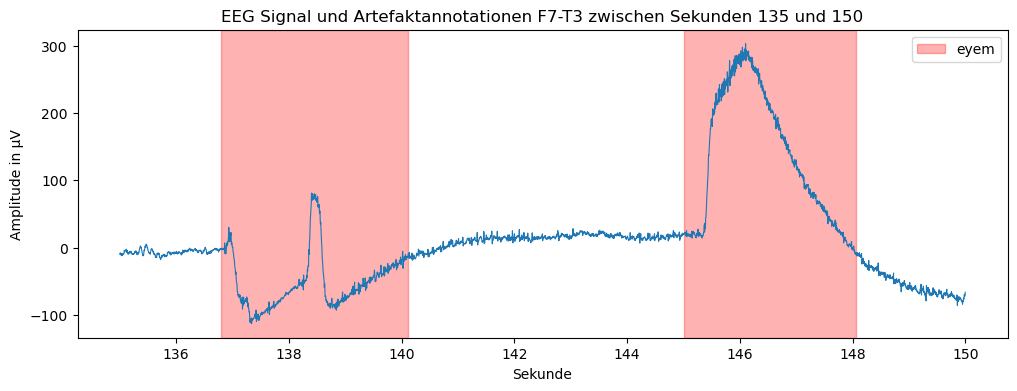

In [9]:
from utils.visualize_eeg import visualize_eeg_with_artifacts

fig = visualize_eeg_with_artifacts(
    edf_file_path="../../../../tuar_processed/train/aaaaaaju_s005_t000.edf",
    csv_file_path="../../../../tuar_processed/train/aaaaaaju_s005_t000.csv",
    channel='F7-T3',
    interval_start=135,
    interval_stop=150
)
fig.savefig("output/exp_02_06_artifact_visualization_comparison_2.svg")
fig.show()

In [1]:
3

3